<center><h1>Blood Donation Analysis</h1></center>

<img src="donate.jpg" height=30px>

<h4>About  the Project:</h4>
<br>
<p style="text-indent:5em">The donation of blood is important because most often people requiring blood do not receive it on time causing loss of life. Examples include severe accidents, patients suffering from dengue or malaria, or organ transplants. Extreme health conditions such as Leukemia and bone marrow cancer, where affected individuals experience sudden high blood loss and need an urgent supply of blood and do not have it can also lead to loss of life. Sound data-driven systems for tracking and predicting donations and supply needs can improve the entire supply chain, making sure that more patients get the blood transfusions they need, which can reduce mortality risk.</p>

<p style="text-indent:5em">One of the interesting aspects about blood is that it is not a typical commodity. First, there is the perishable nature of blood. Grocery stores face the dilemma of perishable products such as milk, which can be challenging to predict accurately so as to not lose sales due to expiration. Blood has a shelf life of approximately 42 days according to the American Red Cross (Darwiche, Feuilloy et al. 2010). However, what makes this problem more challenging than milk is the stochastic behavior of blood supply to the system as compared to the more deterministic nature of milk supply. Whole blood is often split into platelets, red blood cells, and plasma, each having their own storage requirements and shelf life. For example, platelets must be stored around 22 degrees Celsius, while red blood cells 4 degree Celsius, and plasma at -25 degrees Celsius. Moreover, platelets can often be stored for at most 5 days, red blood cells up to 42 days, and plasma up to a calendar year.</p>

<p style="text-indent:5em">Amazingly, only around 5% of the eligible donor population actually donate (Linden, Gregorio et al. 1988, Katsaliaki 2008). This low percentage highlights the risk humans are faced with today as blood and blood products are forecasted to increase year-on-year. This is likely why so many researchers continue to try to understand the social and behavioral drivers for why people donate to begin with. The primary way to satisfy demand is to have regularly occurring donations from healthy volunteers.</p>


<h3>Aim Of Project:</h3>
<p style="text-indent:5em">
To build a model which can identify who is likely to donate blood again.



<br>
<h4>Models implemented:</h4>

<ul>
<li>Linear Discriminant Analysis</li>
<li>Logistic Regression</li>
<li>Suport Vector Machine</li>
<li>Random Forest</li>
<li> Ada Boosting</li>
<li>Decision Tree</li>
    <li>MLP Classifier</li>
</ul>

### Importing the library

In [1]:
#importing library for reading, writing and perform basic operations
import pandas as pd
import numpy as np

#Importing library for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing library for splitting model into train and test and for data transformation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score

In [2]:
#Filter the unwanted warning
import warnings
warnings.simplefilter("ignore")

In [3]:
#Importing all the required model for model comparision
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import  ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

#GridSearchCV= Exhaustive search over specified parameter values for an estimator. Important members are fit, predict.
#cross_val_score= used for trainin model using crossvalidataion method
#StratifiedFold=Provides train/test indices to split data in train/test sets
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

### Reading the Data

In [4]:
train=pd.read_csv("blood-train.csv")
test=pd.read_csv("blood-test.csv")

In [5]:
#Printing the train and test size
print("Train Shape : ",train.shape)
print("Test Shape : ",test.shape)

Train Shape :  (576, 6)
Test Shape :  (200, 5)


In [6]:
#Printing first five rows of data
train.head()

Unnamed: 0  Months since Last Donation  Number of Donations  \
0         619                           2                   50   
1         664                           0                   13   
2         441                           1                   16   
3         160                           2                   20   
4         358                           1                   24   

   Total Volume Donated (c.c.)  Months since First Donation  \
0                        12500                           98   
1                         3250                           28   
2                         4000                           35   
3                         5000                           45   
4                         6000                           77   

   Made Donation in March 2007  
0                            1  
1                            1  
2                            1  
3                            1  
4                            0

In [7]:
#Counting the number of people who donated and not donated
train["Made Donation in March 2007"].value_counts()

0    438
1    138
Name: Made Donation in March 2007, dtype: int64

In [8]:
#Storing dependent variable in Y
Y=train.iloc[:,-1]
Y.head()

0    1
1    1
2    1
3    1
4    0
Name: Made Donation in March 2007, dtype: int64

In [9]:
#Printing last 5 rows
train.tail()

Unnamed: 0  Months since Last Donation  Number of Donations  \
571         698                          23                    1   
572         433                          16                    3   
573         360                          21                    2   
574         541                          39                    1   
575          74                          72                    1   

     Total Volume Donated (c.c.)  Months since First Donation  \
571                          250                           23   
572                          750                           86   
573                          500                           52   
574                          250                           39   
575                          250                           72   

     Made Donation in March 2007  
571                            0  
572                            0  
573                            0  
574                            0  
575                            0

In [10]:
#Removing Unnamed: 0 columns
old_train=train
train=train.iloc[:,1:5]
test=test.iloc[:,1:5]

In [11]:
#Printing firsr  rows
train.head()

Months since Last Donation  Number of Donations  \
0                           2                   50   
1                           0                   13   
2                           1                   16   
3                           2                   20   
4                           1                   24   

   Total Volume Donated (c.c.)  Months since First Donation  
0                        12500                           98  
1                         3250                           28  
2                         4000                           35  
3                         5000                           45  
4                         6000                           77

In [12]:
#Merging both train and test data
df=pd.merge(train,test)

In [13]:
df.head()

Months since Last Donation  Number of Donations  \
0                           2                    2   
1                           2                    2   
2                           2                    2   
3                           2                    2   
4                           2                    2   

   Total Volume Donated (c.c.)  Months since First Donation  
0                          500                            4  
1                          500                            4  
2                          500                            4  
3                          500                            4  
4                          500                            4

In [14]:
#Setting the independent variable and dependent variable
X=df.iloc[:,:]
X.head()

Months since Last Donation  Number of Donations  \
0                           2                    2   
1                           2                    2   
2                           2                    2   
3                           2                    2   
4                           2                    2   

   Total Volume Donated (c.c.)  Months since First Donation  
0                          500                            4  
1                          500                            4  
2                          500                            4  
3                          500                            4  
4                          500                            4

### Data Exploration

In [15]:
# Statistics of the data
train.describe()

Months since Last Donation  Number of Donations  \
count                  576.000000           576.000000   
mean                     9.439236             5.427083   
std                      8.175454             5.740010   
min                      0.000000             1.000000   
25%                      2.000000             2.000000   
50%                      7.000000             4.000000   
75%                     14.000000             7.000000   
max                     74.000000            50.000000   

       Total Volume Donated (c.c.)  Months since First Donation  
count                   576.000000                   576.000000  
mean                   1356.770833                    34.050347  
std                    1435.002556                    24.227672  
min                     250.000000                     2.000000  
25%                     500.000000                    16.000000  
50%                    1000.000000                    28.000000  
75%                    1750.000000                    49.250000  
max                   12500.000000                    98.000000

This tells us that
<ul>
    <li>On a average everyone donates blood in every 9.5 months</li>
    <li>Everyone donates 5 times blood ona an average</li>
    <li>The average volume donated by everyone is 1356 c.c</li>
    <li>Everyone have donated atleast 250 c.c of blood</li>
</ul>    


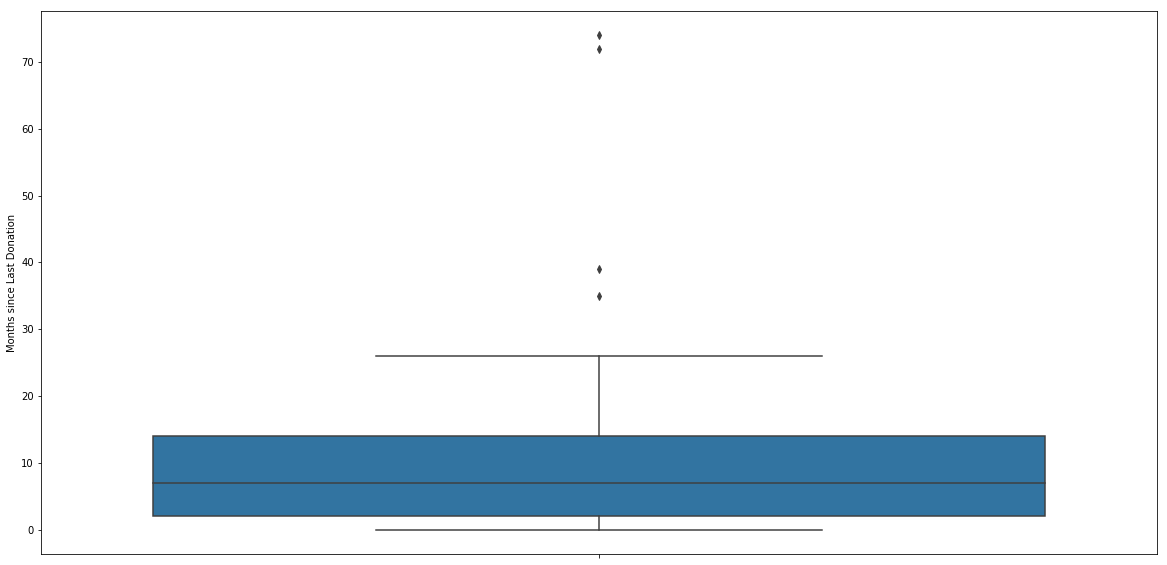

In [16]:
#Boxplot for Months since Last Donation
plt.figure(figsize=(20,10)) 
sns.boxplot(y="Months since Last Donation",data=old_train)

We see from the above boxplot that the maximum people have donated blood in nearby 10 months.

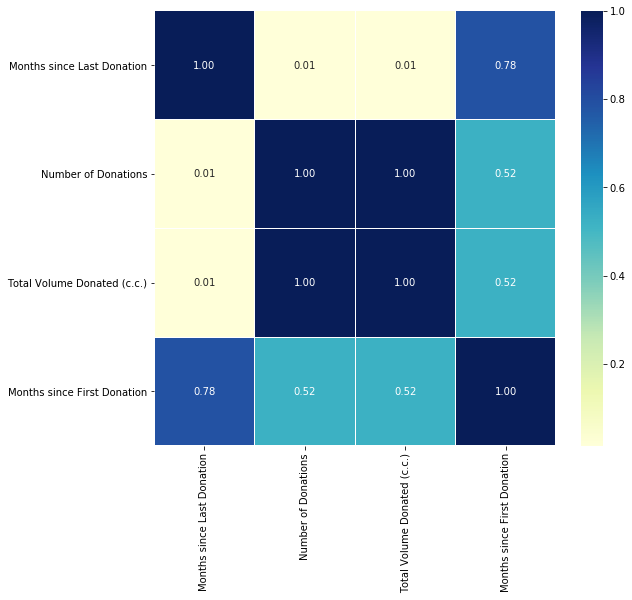

In [17]:
#Correlation between all variables [Checking how different variable are related]
corrmat=X.corr()
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1,fmt = ".2f",annot=True) 

Only months_since_first_donation seems to have a significative correlation with the target variable.

In [18]:
#Printing all unique value for Month Since Last donation
train["Months since Last Donation"].unique()

array([ 2,  0,  1,  4,  5,  3, 12,  6, 11,  9, 10, 13, 14,  8,  7, 16, 23,
       21, 18, 22, 26, 35, 74, 15, 20, 17, 25, 39, 72], dtype=int64)

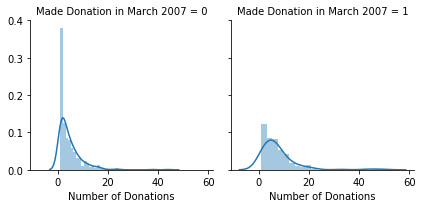

In [19]:
#Exploring Number of Donations
g = sns.FacetGrid(old_train, col='Made Donation in March 2007')
g = g.map(sns.distplot, "Number of Donations")

We notice that num_donations distributions are not the same in the class 1 and class 0 subpopulations. Indeed, there is a peak corresponding to the people who have donated only 0-1 time will not donate blood and who have donated 2-3 will likely donate.

It seems that people have donated more number of times are more likely to donate blood.

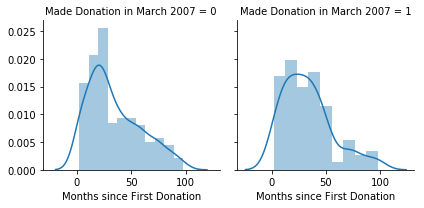

In [20]:
#Exploring Months Since First Donation
g = sns.FacetGrid(old_train, col='Made Donation in March 2007')
g = g.map(sns.distplot, "Months since First Donation")

We notice that months_since_first_donation distributions are not the same in the class 1 and class 0 subpopulations. Indeed, there is a peak corresponding to the people who have just donated recently(in 6-20 months) will not donate blood.

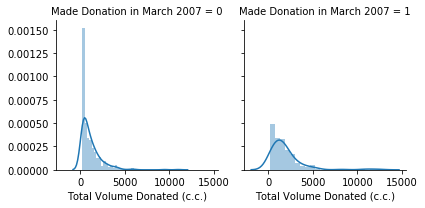

In [21]:
#Exploring Total Volume Donated
g = sns.FacetGrid(old_train, col='Made Donation in March 2007')
g = g.map(sns.distplot, "Total Volume Donated (c.c.)")

### Feature Engineering

Volume donated is also a good feature to know wether the donor will donate or not.

In [22]:
#Creating new variable for calculating how many times a person have donated
X["Donating for"] = (X["Months since First Donation"] - X["Months since Last Donation"])

In [23]:
#Seeing first five rows of the DataFrame
X.head()

Months since Last Donation  Number of Donations  \
0                           2                    2   
1                           2                    2   
2                           2                    2   
3                           2                    2   
4                           2                    2   

   Total Volume Donated (c.c.)  Months since First Donation  Donating for  
0                          500                            4             2  
1                          500                            4             2  
2                          500                            4             2  
3                          500                            4             2  
4                          500                            4             2

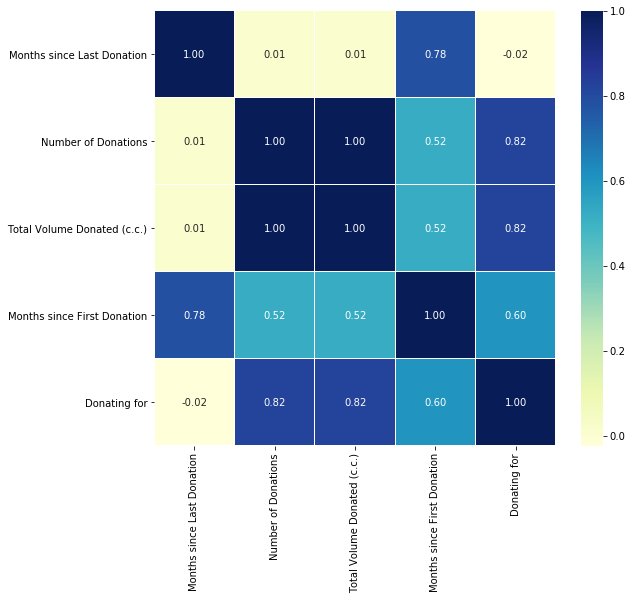

In [24]:
#Correlation between all variables
corrmat=X.corr()
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1,fmt = ".2f",annot=True) 

Since Total Volume Donated (c.c.) have the very high correlation with other variables so we are dropping the variable.

In [25]:
#Dropping the unnecessary column
X.drop([ 'Total Volume Donated (c.c.)'], axis=1, inplace=True)

In [26]:
X.head()

Months since Last Donation  Number of Donations  \
0                           2                    2   
1                           2                    2   
2                           2                    2   
3                           2                    2   
4                           2                    2   

   Months since First Donation  Donating for  
0                            4             2  
1                            4             2  
2                            4             2  
3                            4             2  
4                            4             2

In [27]:
#Shape of independent variable
X.shape

(810, 4)

### Feature Transformation

In [28]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

#Fitting and transforming data
X=scale.fit_transform(X)

In [29]:
train=X[:576]

In [30]:
train.shape

(576, 4)

In [31]:
test=X[576:]

In [32]:
Y=Y[:576]

In [33]:
Y.shape

(576,)

### Model Building

###### Model Comparision

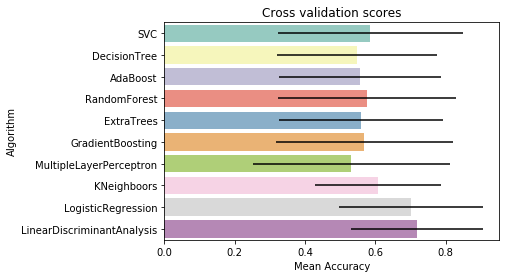

In [34]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

# Modeling step Test differents algorithms 
#We will compare different algorithm using roc_auc value and will implememt the best algorithm
random_state = 7
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier,X=train, y = Y, scoring = "roc_auc", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [35]:
#Splitting into train and test set
xtrain,xtest,ytrain,ytest=train_test_split(train,Y,test_size=0.2,random_state=0)

### <center><u>StepsTo Follow
</u>
    <br><br>
<ul style="margin-left:40%">
    <li>Create the object</li>
    <li>Do the necessary hyperparameter tuning</li>
    <li>Fit the model</li>
    <li>Predict the test set</li>
    <li>Compute roc_auc_score</li>
    <li>Repeat above step for all model</li>
    <li>Compare roc_auc_Score of all model and choose the best model</li>
</ul>
</center>
<br><br>

#### Linear Discriminant Analysis

Linear discriminant analysis (LDA), normal discriminant analysis (NDA), or discriminant function analysis is a generalization of Fisher's linear discriminant, a method used in statistics, pattern recognition, and machine learning to find a linear combination of features that characterizes or separates two or more classes of objects or events. The resulting combination may be used as a linear classifier, or, more commonly, for dimensionality reduction before later classification.

<br><br>
<img src="lda.png">


<br>
<p>For more reading click <a href="https://www.digitalvidya.com/blog/linear-discriminant-analysis/">here</a>.<br><br>

In [36]:
#Building the model
model=LinearDiscriminantAnalysis(solver="lsqr")
model.fit(xtrain,ytrain)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='lsqr', store_covariance=False, tol=0.0001)

In [37]:
#Fitting the model
model.fit(xtrain,ytrain)      

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='lsqr', store_covariance=False, tol=0.0001)

In [38]:
#Predicting the test data
pred=model.predict(xtest)

In [39]:
#Seeing the confusion matrix
confusion_matrix(pred,ytest)

array([[80, 26],
       [ 1,  9]], dtype=int64)

In [40]:
#Printing the roc auc score
roc_auc_score(pred,ytest)

0.8273584905660378

#### Logistic regression

    In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1 and the sum adding to one.

     Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1". In the logistic model, the log-odds (the logarithm of the odds) for the value labeled "1" is a linear combination of one or more independent variables ("predictors"); the independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable (any real value). The corresponding probability of the value labeled "1"  can vary between 0 (certainly the value "0") and 1 (certainly the value "1"), hence the labeling; the function that converts log-odds to probability is the logistic function, hence the name. The unit of measurement for the log-odds scale is called a logit, from logistic unit, hence the alternative names. Analogous models with a different sigmoid function instead of the logistic function can also be used, such as the probit model; the defining characteristic of the logistic model is that increasing one of the independent variables multiplicatively scales the odds of the given outcome at a constant rate, with each independent variable having its own parameter; for a binary dependent variable this generalizes the odds ratio.
    
    
<img src="logis.png">
  
  
<br>
<p>For more reading click <a href="https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html">here</a>.<br><br>
    
<br>

In [41]:
#Building the model
logreg = LogisticRegression(random_state=7)
#Fitting the model
logreg.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=7, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
#Predicting on the test data
pred=logreg.predict(xtest)

In [43]:
#Printing the roc_auc_score
roc_auc_score(pred,ytest)

0.6008771929824561

#### Support Vector Machine

    A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. After giving an SVM model sets of labeled training data for either of two categories, they’re able to categorize new examples..
    
    
<img src="sv.jpg" height=100px >
  
  
<br>
<p>For more reading click <a href="https://monkeylearn.com/blog/introduction-to-support-vector-machines-svm/">here</a>.<br><br>
    
<br>

In [44]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="roc_auc", n_jobs= 4, verbose = 1)

#Fitting the model
gsSVMC.fit(train,Y)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 212 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:    4.5s finished


0.6886389359590667

In [45]:
#Predicting on the test data
pred=gsSVMC.predict(xtest)

In [46]:
#Printing the confusion matrix
confusion_matrix(pred,ytest)

array([[80, 25],
       [ 1, 10]], dtype=int64)

In [47]:
#Printing the roc auc score
roc_auc_score(pred,ytest)

0.8354978354978355

#### Random Forest

     Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual.
<br>
<img src="rf.png">
<br>

In [48]:
#Buildin the model
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [80, 90, 100, 110],
              "max_features": [2, 3],
              "min_samples_split": [8, 10, 12],
              "min_samples_leaf": [3, 4, 5],
              "bootstrap": [False],
              "n_estimators" :[100, 200, 300, 1000],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="roc_auc", n_jobs= 4, verbose = 1)

#Fitting the model
gsRFC.fit(xtrain,ytrain)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   48.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  5.4min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:  7.8min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed: 10.6min
[Parallel(n_jobs=4)]: Done 2880 out of 2880 | elapsed: 12.5min finished


0.6174691793713534

In [49]:
#Predicting the test data result
pred=gsRFC.predict(xtest)

In [50]:
#Printing the confusion matrix
confusion_matrix(pred,ytest)

array([[78, 26],
       [ 3,  9]], dtype=int64)

In [51]:
#Printingthe roc auc score
roc_auc_score(pred,ytest)

0.75

#### Ada Boosting

    AdaBoost, short for Adaptive Boosting, is a machine learning meta-algorithm formulated by Yoav Freund and Robert Schapire, who won the 2003 Gödel Prize for their work. It can be used in conjunction with many other types of learning algorithms to improve performance. The output of the other learning algorithms ('weak learners') is combined into a weighted sum that represents the final output of the boosted classifier. AdaBoost is adaptive in the sense that subsequent weak learners are tweaked in favor of those instances misclassified by previous classifiers. AdaBoost is sensitive to noisy data and outliers.[1] In some problems it can be less susceptible to the overfitting problem than other learning algorithms. The individual learners can be weak, but as long as the performance of each one is slightly better than random guessing, the final model can be proven to converge to a strong learner.
<img src="ada.png">

In [52]:
#Building the model
abc = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1),
                         random_state = 10)
#Tuning Parameters
param_grid = {'n_estimators': [50, 100, 150],
              'algorithm': ['SAMME', 'SAMME.R']}

#Applying GridSearch
abc = GridSearchCV(abc, param_grid = param_grid, cv = 5,
                   scoring = 'roc_auc')

#Fitting the model
abc.fit(train, Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=10),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 150], 'algorithm': ['SAMME', 'SAMME.R']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [53]:
#Predicting the test data
pred= abc.predict(xtest)

In [54]:
#Printing confusion matrix
confusion_matrix(pred,ytest)

array([[79, 31],
       [ 2,  4]], dtype=int64)

In [55]:
#Printing roc auc score
roc_auc_score(pred,ytest)

0.6924242424242424

#### Decision Tree

    A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes).

<img src="dtree.png">

In [56]:
#Building the model
model=DecisionTreeClassifier(max_leaf_nodes=4,max_features=3,max_depth=15)

In [57]:
#Fitting the model
model.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=3, max_leaf_nodes=4, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [58]:
#Predicting the test data
pred=model.predict(xtest)

In [59]:
#printing the confusion matrix
confusion_matrix(pred,ytest)

array([[78, 24],
       [ 3, 11]], dtype=int64)

In [60]:
#Printing accuracy score
accuracy_score(pred,ytest)

0.7672413793103449

In [61]:
#Printing roc auc score
roc_auc_score(pred,ytest)

0.7752100840336134

#### MLP Classifier

    MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.

<img src="mlp.png">

In [62]:
#Building the Model
clf_neural = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(25,),random_state=1)
clf_neural.fit(train, Y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [63]:
#Predicting from the fitted model on test data
print('Predicting...\nIn Test Data')
predicted = clf_neural.predict(xtest)

Predicting...
In Test Data


In [64]:
#printing confusion matrix
confusion_matrix(predicted,ytest)

array([[80, 24],
       [ 1, 11]], dtype=int64)

In [65]:
#Printing roc auc score
roc_auc_score(pred,ytest)

0.7752100840336134

## Conclusion

<p style="text-indent:5em">Applying  Support Vector Machine gave us the maximum roc_auc_score of 0.84. 
Thus this model can be used to determine whether a person will donate the blood or not.